In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls controls/

DIES6_ALL_REP1_in_vitro_nucl_array.txt
DIES6_ALL_REP1_naked_plasmid.txt
DIES6_REP2_780READS_in_vitro_nucl_array.txt
DIES6_rep2_780READS_naked_plasmid.txt
in vitro array_disw2_rep2_780READS.csv
in_vitro_nucl_array   (31 .. 2214).fa
in_vitro_nucl_array_(31 .. 2214).fa
naked plasmid_disw2_rep1_780READS.csv
naked plasmid_disw2_rep2_780READS.csv
naked_plasmid.fa
nucl array_disw2_rep1_780READS.csv
wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt
wt_mat_Megalodon_repIII_naked_plasmid.txt


In [5]:
wt_nucarray = np.loadtxt("controls/wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt")
wt_nucarray.shape

(780, 1966)

<AxesSubplot:>

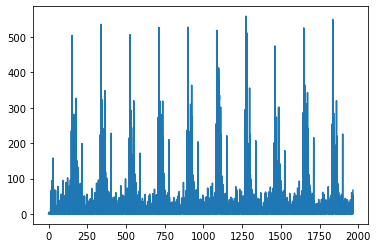

In [6]:
sns.lineplot(x = range(wt_nucarray.shape[1]), y = np.cumsum(wt_nucarray, axis = 0)[779,:])
#the last line of the array contains the cumulative occupation per base

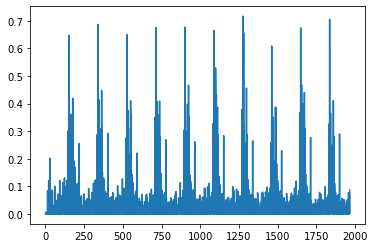

In [8]:
sns.lineplot(x = range(wt_nucarray.shape[1]), y = np.mean(wt_nucarray, axis = 0))
plt.show()


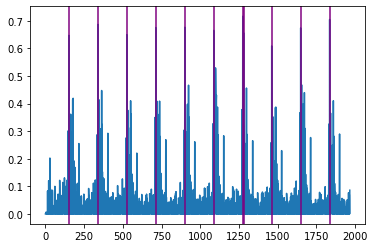

In [11]:
peaks = np.where(np.mean(wt_nucarray, axis = 0) >0.6)

sns.lineplot(x = range(wt_nucarray.shape[1]), y = np.mean(wt_nucarray, axis = 0))
for position in peaks[0]:
    plt.axvline(position, color = "purple")
plt.show()

In [12]:
np.gradient(peaks[0]).mean()

170.0

Text(33.0, 0.5, 'DNA molecule')

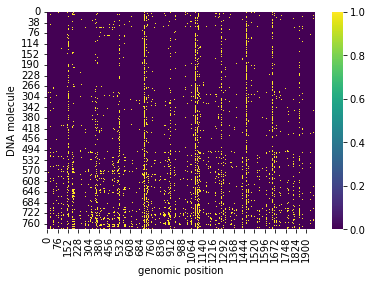

In [13]:
#heatmap
sns.heatmap(wt_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")

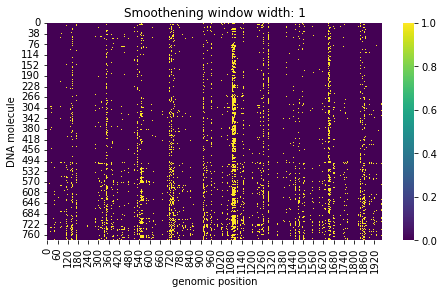

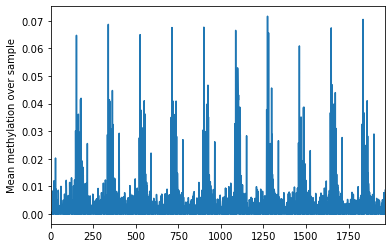

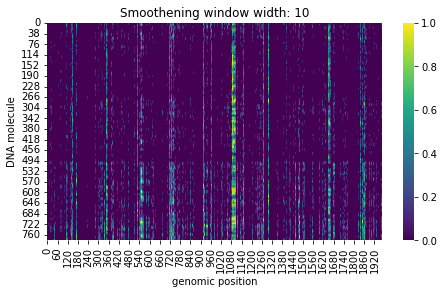

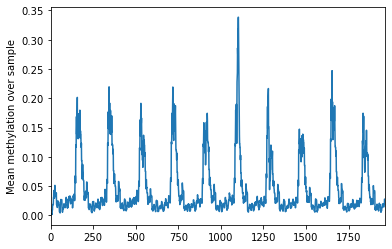

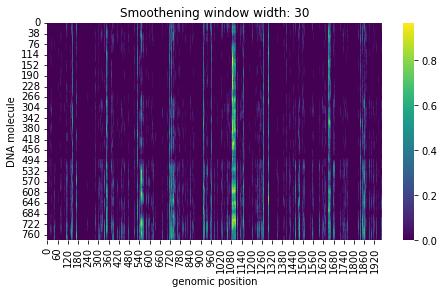

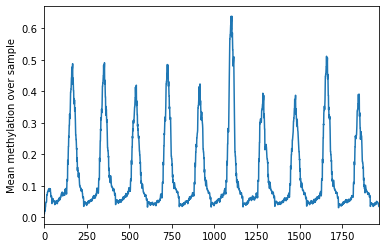

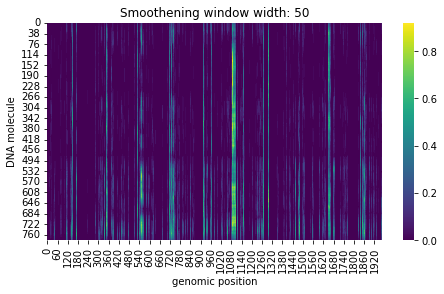

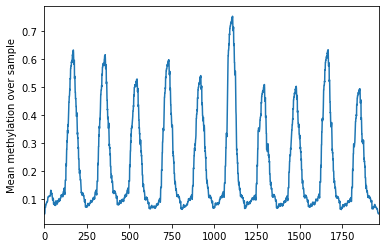

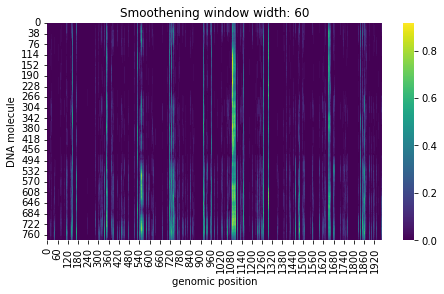

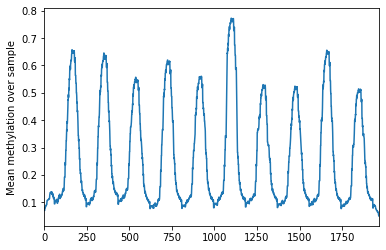

In [14]:
#calculate a sliding mean for each molecule
np.convolve(wt_nucarray[0,:], np.ones(10)/10, mode='same').shape

#N = 20 #smoothening window

#def smooth(array):
 #   return np.convolve(array, np.ones(N)/N, mode = "same")

for N in [1, 10, 30, 50, 60]:
    
    def smooth(array):
        return np.convolve(array, np.ones(N)/N, mode = "same")
    
    wt_nucarray_smooth = np.apply_along_axis(smooth, 0, wt_nucarray)
    
    plt.figure(figsize=(7.5,4))
    sns.heatmap(wt_nucarray_smooth, cmap = "viridis")
    plt.xlabel("genomic position")
    plt.ylabel("DNA molecule")
    plt.xlim(0, 1966)
    plt.title("Smoothening window width: " + str(N))
    plt.show()

    sns.lineplot(x = range(wt_nucarray_smooth.shape[1]), 
                 y = np.convolve(wt_nucarray_smooth.mean(axis = 0), np.ones(N)/10, mode ="same")
                )
    plt.ylabel("Mean methylation over sample")
    plt.xlim(0, 1966)
    plt.show()

## Read in samples for origin ARS305 to set up the annotation of the nucleosome areas

In [226]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")

ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
                          header = None, index_col = 0)
ARS305_anno.columns = ["position", "length"]
ARS305_anno.index = ARS305_anno.index.astype("string")
ARS305_anno.index = ARS305_anno.index.str.strip()

ARS305_anno["pos_start"] = ARS305_anno.position.str.split(".").str[0].astype(int) -1
ARS305_anno["pos_stop"] = ARS305_anno.position.str.split(".").str[2].astype(int) -1

In [227]:
ARS305_anno #.loc["ARS305", "pos_start"]

,position,length,pos_start,pos_stop
0,,,,
NS-3,63..156,94,62,155
L-2,157..218,62,156,217
NS-2,219..365,147,218,364
L-1,366..378,13,365,377
NS-1,379..525,147,378,524
ARS305,543..630,88,542,629
NS+1,646..792,147,645,791
L+1,793..836,44,792,835
NS+2,837..983,147,836,982


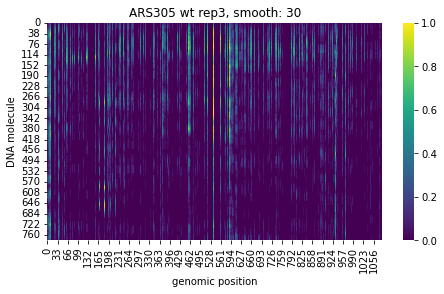

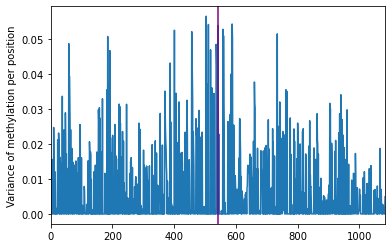

In [228]:
smooth_window = 30

def smooth(array):
        return np.convolve(array, np.ones(smooth_window)/smooth_window, mode = "same")
    
ARS305_wt_smooth = np.apply_along_axis(smooth, 0, ARS305_wt)
    
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3, smooth: " + str(smooth_window))
plt.show()

sns.lineplot(x = range(ARS305_wt_smooth.shape[1]), 
                 y = ARS305_wt_smooth.std(axis = 0)**2
                )
plt.ylabel("Variance of methylation per position")
plt.xlim(0, 1084)
plt.axvline(ARS305_anno.loc["ARS305", "pos_start"], color = "purple")
plt.show()

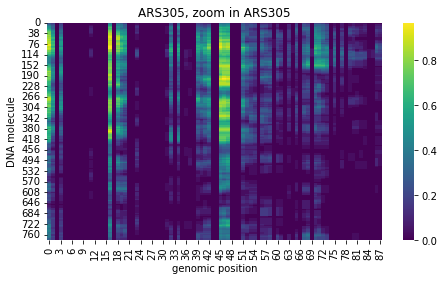

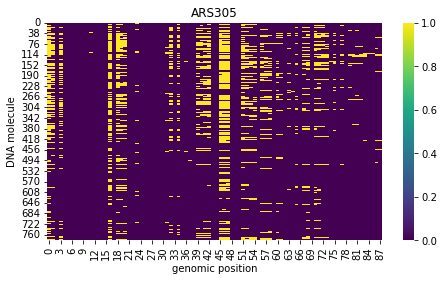

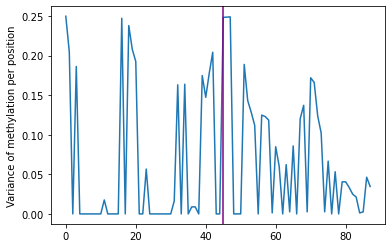

In [229]:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305, zoom in ARS305")
plt.show()

plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305")
plt.show()

sns.lineplot(x = range(630-542), 
                 y = ARS305_wt[:, 542:630].std(axis = 0)**2
                )
plt.axvline(45, color = "purple")
plt.ylabel("Variance of methylation per position")
plt.show()

#sns.lineplot(x = range(630-542), 
#                 y = ARS305_wt[:, 542:630].cumsum(axis = 0)[779, :]/779
#            )
#plt.axvline(45, color = "purple")
#plt.ylabel("Percent methylated")
#plt.show()

<AxesSubplot:>

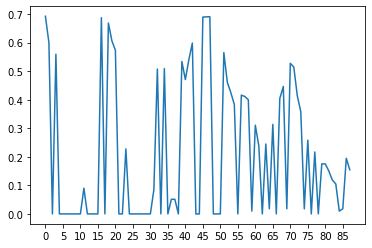

In [108]:
#this computes the percent of methylation at a specific base
(ARS305_wt[:, 542:630].cumsum(axis = 0)/780)

#as a measure for the heterogeneity, try the entropy:
# alternatively, try: from scipy.stats import entropy

def entropy(labels, base=None):
    base = math.e if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

#https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

#entropy(ARS305_wt[:,6])
#np.unique(ARS305_wt[:,6], return_counts = True)

g = sns.lineplot(x = range(630-542), y = np.apply_along_axis(entropy, 0, ARS305_wt[:, 542:630]))
g.set_xticks(range(0, 630-542, 5))
g

In [88]:
entropy_ARS305_wt = np.apply_along_axis(entropy, 0, ARS305_wt)
entropy_ARS305_wt.min(), entropy_ARS305_wt.max(), np.count_nonzero(entropy_ARS305_wt)

(-0.0, 0.6928184134311288, 545)

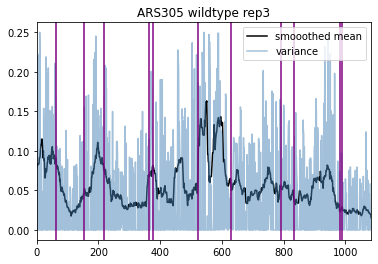

In [224]:
N = 30

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt_smooth.shape[1])
plt.title("ARS305 wildtype rep3")


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.axvline(62, color = "purple", label = "border")
for border in ARS305_anno.loc[:, "pos_stop"]:
    #plt.ylabel("Variance of methylation per position")
    #plt.xlim(0, 1084)
    plt.axvline(border, color = "purple")

In [ ]:
ARS305_wt_rep2 = pd.read_csv("ARS305/mat_Megalodon_repII_ARS305_end_LexA.txt",
                            sep= "\t", header = None)
ARS305_wt_rep2.drop(ARS305_wt_rep2.columns[[1084, 1085,1086]], axis = 1, inplace = True)
ARS305_wt_rep2.dropna(axis = 0, inplace =True)
#this file could not be loaded with numpy - check in pandas suggests that it contains some multiple different kind of data
# - at least there is not only binary data, but NaNs and continuous values as well

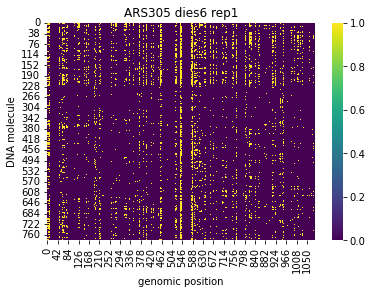

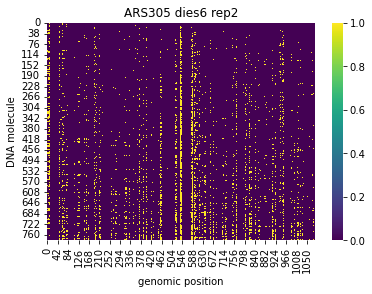

In [209]:
ARS305_dies6_rep1 = np.loadtxt("ARS305/DIES6_ALL_REP1_ARS305_end_LexA.txt")
ARS305_dies6_rep1.shape

sns.heatmap(ARS305_dies6_rep1, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep1.shape[1])
plt.title("ARS305 dies6 rep1")
plt.show()

ARS305_dies6_rep2 = np.genfromtxt("ARS305/DIES6_ARS305_REP2_780READS.csv", dtype = int, delimiter = ",")
ARS305_dies6_rep2.shape

sns.heatmap(ARS305_dies6_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep2.shape[1])
plt.title("ARS305 dies6 rep2")
plt.show()

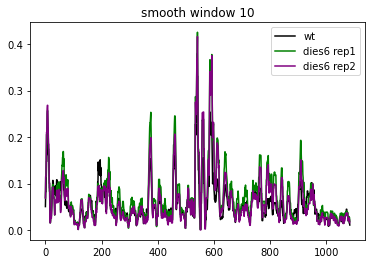

6.792323940029017e-89

In [298]:
smooth = 10

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1")
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2")
plt.title("smooth window " + str(smooth))
plt.show()

ARS305_wt_smooth_mean = np.convolve(ARS305_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep1_smooth_mean = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep2_smooth_mean = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_ARS305 = np.concatenate((ARS305_wt_smooth_mean.reshape(1, 1084), 
                              ARS305_dies6_rep1_smooth_mean.reshape(1, 1084),
                              ARS305_dies6_rep2_smooth_mean.reshape(1, 1084)),
                              axis = 0)

from scipy.stats import wilcoxon

w, p = wilcoxon(means_ARS305[0,:], means_ARS305[1,:], alternative = "two-sided")
p

In [293]:
wilcoxon(ARS305_dies6_rep1.mean(axis = 0), 
         ARS305_dies6_rep2.mean(axis = 0), alternative = "two-sided")

WilcoxonResult(statistic=12954.0, pvalue=1.627377475716176e-58)

In [317]:
ARS305_segments = ARS305_anno.drop(columns = "position")
#ARS305_segments["wt_rep3"] = ARS305_wt_smooth_mean["pos_start":"pos_stop"]

ARS305_segments.loc["L-2", "wt_rep3"]

2